In [2]:
from __future__ import division, print_function
import os, sys, json
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy.spatial import distance as dist
from scipy import stats
from sklearn import preprocessing, manifold, decomposition, random_projection, neighbors, metrics, \
    naive_bayes, linear_model
from sklearn.model_selection import cross_val_score

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=1.2)
from IPython import display
np.random.seed(2018)
tf.set_random_seed(2018)


In [3]:
from utils import *

In [6]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
X_train, X_test = mnist.train.images, mnist.test.images
print (X_train.shape, X_test.shape)
labels_train = mnist.train.labels
n_samples = int(mnist.train.num_examples)
print (labels_train.shape)

(55000, 784) (10000, 784)
(55000,)


In [8]:
gnb = GaussianNB()
gnb.fit(X_train, labels_train)

GaussianNB(priors=None)

In [9]:
gnb.theta_.shape

(10, 784)

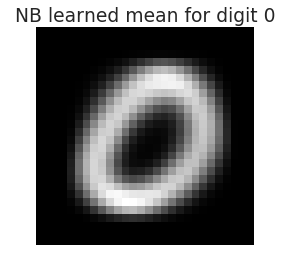

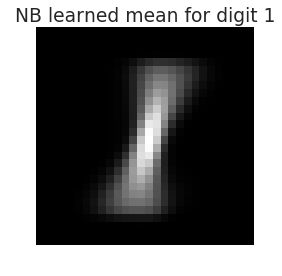

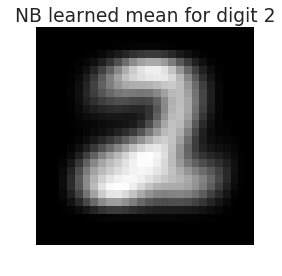

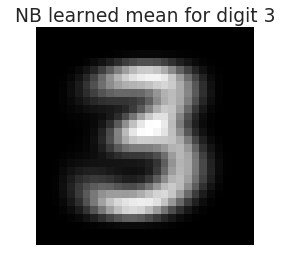

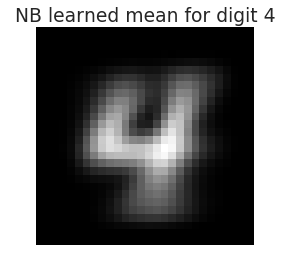

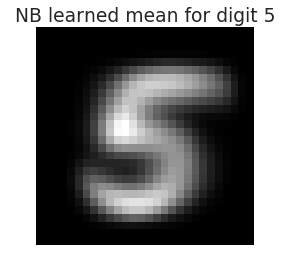

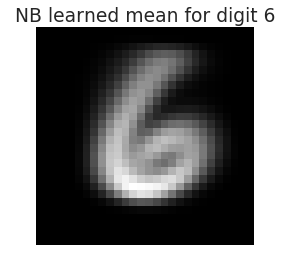

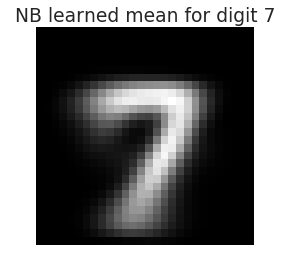

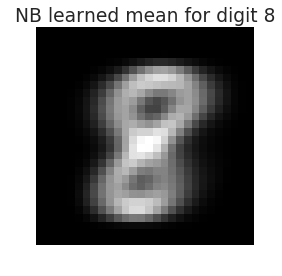

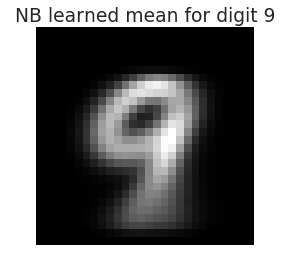

In [11]:
for i in range(10):
    ax = display_mnist_image(gnb.theta_[i].reshape(1, -1))
    ax.set_title('NB learned mean for digit %d' % i)

In [12]:
metrics.accuracy_score(mnist.test.labels, gnb.predict(X_test))

0.54920000000000002

In [13]:
logit = linear_model.LogisticRegression()
logit.fit(X_train, labels_train)
print(metrics.accuracy_score(mnist.test.labels, logit.predict(X_test)))

0.9198


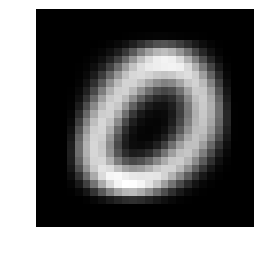

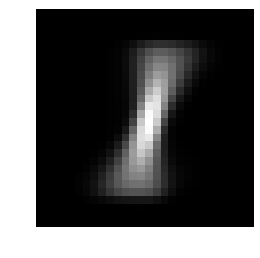

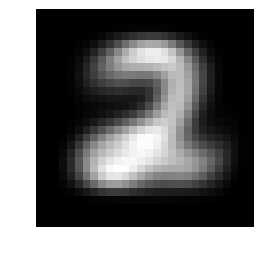

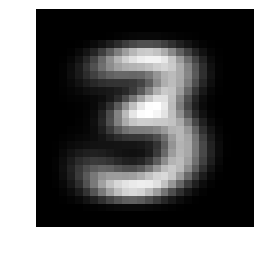

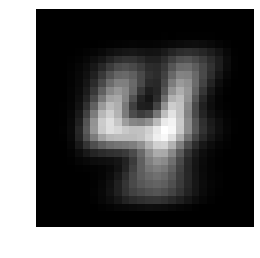

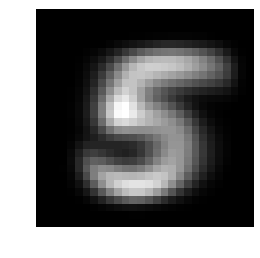

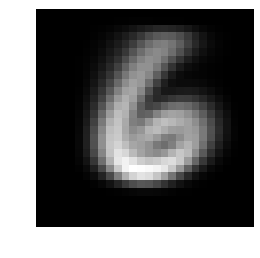

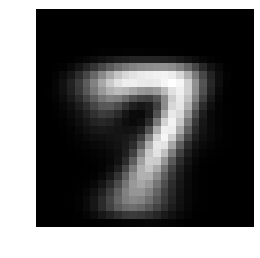

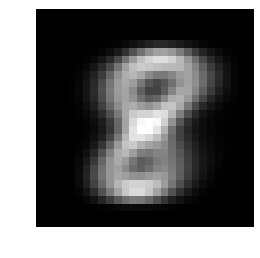

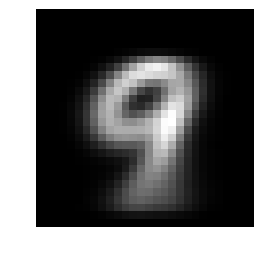

In [14]:
for i in range(10):
    avg_digit = X_train[labels_train==i].mean(axis=0)
    ax = display_mnist_image(avg_digit.reshape(1, -1))

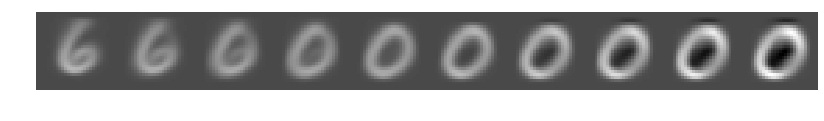

In [15]:
# Interpolate between two digits
z_0_avg = X_train[labels_train == 0].mean(axis=0)
z_6_avg = X_train[labels_train == 6].mean(axis=0)

# The interpolation vector pointing from 6 -> 0
z_6to0 = z_0_avg - z_6_avg

x_gens = []
for alpha in np.linspace(-1, 1, 10):
    z_interp = z_0_avg + alpha * z_6to0
#     ax = display_mnist_image(vae.generate(z_interp.reshape(1, -1)))
    x_gens.append(z_interp.reshape(1, -1))
    
ax = display_mnist_images(x_gens, figsize=(14, 5))

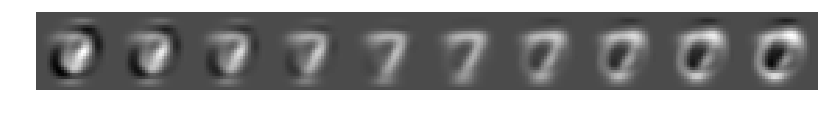

In [16]:
z_7_avg = X_train[labels_train == 7].mean(axis=0)

xs = []
for alpha in np.linspace(-1, 1, 10):
    z_interp = z_7_avg + alpha * z_6to0
    xs.append(z_interp.reshape(1, -1))

ax = display_mnist_images(xs, figsize=(14, 5))